## ![](https://user-images.githubusercontent.com/45433843/92992857-bb270f80-f4a2-11ea-9bd1-ff27c93114d7.png)
# Use Naive Bayses Classifier to predict if a Flight Will be Delayed 

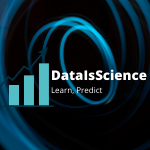

# BackGround

The flights dataset is a record of all the flights that took place inside of the US for the year 2017. We will use 
the dataset to predict wether a particular flight will arrive late to its destination.

# Step1: Import the Dataset

In [22]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [4]:
# The flights dataset
flights = pd.read_csv("flights.csv", index_col=False).dropna()
flights.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2017,1,18,3,2017-01-18,19977,N426UA,RNO,"Reno, NV",Nevada,...,17.0,6.0,903,844.0,0.0,0.0,138.0,130.0,107.0,804.0
1,2017,1,19,4,2017-01-19,20366,N371CA,LGA,"New York, NY",New York,...,32.0,4.0,2242,2236.0,0.0,0.0,222.0,189.0,153.0,1107.0
2,2017,1,22,7,2017-01-22,19393,N7829B,BWI,"Baltimore, MD",Maryland,...,8.0,5.0,1230,1254.0,0.0,0.0,60.0,53.0,40.0,220.0
3,2017,1,12,4,2017-01-12,19790,N915AT,JFK,"New York, NY",New York,...,27.0,7.0,1135,1112.0,0.0,0.0,145.0,131.0,97.0,636.0
4,2017,1,30,1,2017-01-30,20409,N659JB,MCO,"Orlando, FL",Florida,...,14.0,3.0,1405,1354.0,0.0,0.0,159.0,154.0,137.0,1072.0


In [5]:
flights.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
count,590134.0,590134.000000,590134.000000,590134.000000,590134.000000,590134.000000,590134.000000,590134.000000,590134.000000,590134.000000,590134.000000,590134.0,590134.0,590134.000000,590134.000000,590134.000000,590134.000000
mean,2017.0,6.507300,15.786326,3.941513,19897.718096,1328.309543,1332.430562,16.752466,7.481572,1488.587992,1468.621821,0.0,0.0,147.029043,141.638726,117.404688,856.930767
std,0.0,3.453121,8.774694,1.991443,379.574503,490.315194,503.919228,9.345163,5.823913,517.892123,537.129981,0.0,0.0,77.164338,76.598316,74.224661,624.381731
min,2017.0,1.000000,1.000000,1.000000,19393.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,16.000000,8.000000,31.000000
25%,2017.0,4.000000,8.000000,2.000000,19790.000000,910.000000,914.000000,11.000000,4.000000,1103.000000,1050.000000,0.0,0.0,90.000000,84.000000,62.000000,391.000000
50%,2017.0,7.000000,16.000000,4.000000,19805.000000,1320.000000,1326.000000,14.000000,6.000000,1518.000000,1509.000000,0.0,0.0,128.000000,123.000000,98.000000,680.000000
75%,2017.0,10.000000,23.000000,6.000000,20304.000000,1735.000000,1743.000000,19.000000,9.000000,1920.000000,1917.000000,0.0,0.0,180.000000,175.000000,149.000000,1099.000000
max,2017.0,12.000000,31.000000,7.000000,21171.000000,2359.000000,2400.000000,178.000000,399.000000,2359.000000,2400.000000,0.0,0.0,718.000000,751.000000,711.000000,4983.000000


# Step2: Data visualization 
To predict if a flight will be delayed we will use the difference between the estimated arrivall time (CRS_ARR_TIME) and the actual time  the flight arrived to its destination (ARR_TIME). A positive difference (ARR_TIME - CRS_ARR_TIME) implies that the flight arrived late.

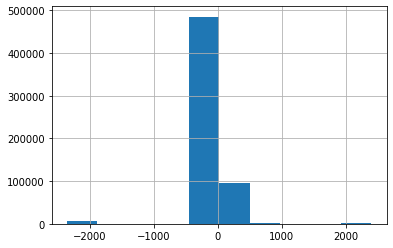

In [7]:
# visualize diffence between CRS_ARR_TIME and ARR_TIME
(flights["ARR_TIME"]-flights["CRS_ARR_TIME"]).hist()

# 
This graph shows that close to 100,000 flights arrived to their destination later than their etimated time arrival.


# Step3: Set the training and text sets

In [12]:
#We only consider fligts that arrived a least 15 minutes late and remove the outliers
y= (flights["ARR_TIME"]-flights["CRS_ARR_TIME"]>15) & (flights["ARR_TIME"]-flights["CRS_ARR_TIME"]<1000)

#transform y values from boolean to 1s and 0s
y= y.astype(np.uint8)
y

0         0
1         0
2         1
3         0
4         0
         ..
599995    0
599996    0
599997    0
599998    0
599999    0
Length: 590134, dtype: uint8

In [15]:
# for this study we will look at the features AIR_TIME AND DISTANCE
X= pd.concat([flights["AIR_TIME"],flights["DISTANCE"]],axis=1)
X

,AIR_TIME,DISTANCE
0,107.0,804.0
1,153.0,1107.0
2,40.0,220.0
3,97.0,636.0
4,137.0,1072.0
...,...,...
599995,25.0,121.0
599996,78.0,588.0
599997,160.0,1371.0
599998,48.0,268.0


In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20, random_state= 17)

#  Step4: Train the classifier 

In [18]:
# Training the naive bayes classifier
naive_bayes= GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#  Step5: Evaluate the classifier

In [20]:
y_pred= naive_bayes.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.8164318333940539


# 
We were able to achieve 81% accuracy just using the two columns AIR_TIME and DISTANCE as predictors.

# Step6: plot the test data

Text(0.5, 1.0, 'Delayed flight')

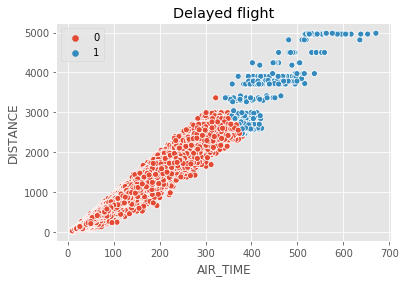

In [33]:
# let's visualize wich flight in the test data arrived late
plt.style.use("ggplot")
sns.scatterplot(X_test.iloc[:,0],X_test.iloc[:,1],hue=y_pred)
plt.title("Delayed flight")

# Conclusion
Longer flights with longer distances above 3000 miles had a minimum of 15 minutes delay with respect to their respective ETA.
Using the AIR_TIME and DISTANCE pedictors, we were able to achieve 81% accuracy.
We recommend trying different combinations of predictors to improve the model.